# Convergence

In [18]:
import scipy.sparse
import scipy.sparse.linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# local
from DC import DynamicChebyshev
from FD import AmericanPutFiniteDifference

In [15]:
# initialize
DC_option_pricing = DynamicChebyshev(r=0.06, S0=36., K=40., T=1., σ=0.2, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing.trunc_domain()
xknots = DC_option_pricing.nodal_points(domain)
Γ = DC_option_pricing.generalized_MC(domain,xknots)

# online phase
DC_option_pricing.dynamic_chebyshev(xknots,Γ)

array(4.85908753)

# Checking Approximation for Increasing Number of Knot Points

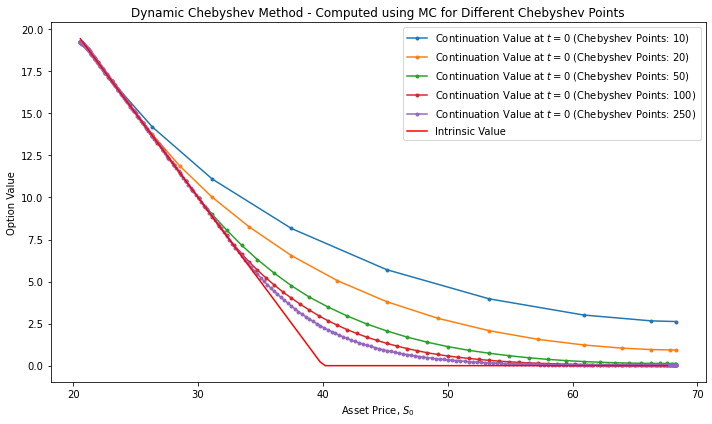

In [21]:
# Define the array of number of Chebyshev points to loop over
chebyshev_points_array = [10, 20, 50, 100, 250]

# Initialize the figure for plotting
plt.figure(figsize=(10, 6))

# Loop over the array of Chebyshev points
for n_chebyshev_pol in chebyshev_points_array:
    # Initialize the DynamicChebyshev object with the current number of Chebyshev points
    option_pricing = DynamicChebyshev(r=0.06, S0=36., K=40., T=1., σ=0.2, dim=10_000, n=252, 
                                      n_chebyshev_pol=n_chebyshev_pol, seed=150_000)

    # Calculate domain, xknots, and generalized moments
    domain = option_pricing.trunc_domain()
    xknots = option_pricing.nodal_points(domain)
    Γ = option_pricing.generalized_MC(domain, xknots)
    option_pricing.dynamic_chebyshev(xknots, Γ)

    # Plot the continuation value at t=0 for each number of Chebyshev points
    plt.plot(np.exp(xknots), option_pricing.C[:,0], '.-', label=f'Continuation Value at $t=0$ (Chebyshev Points: {n_chebyshev_pol})')

# Plot the intrinsic value (only once, as it does not depend on the number of Chebyshev points)
asset_prices_range = np.exp(np.arange(domain[0], domain[1], 0.01))
intrinsic_value = np.maximum(option_pricing.K - asset_prices_range, 0)
plt.plot(asset_prices_range, intrinsic_value, '-r', label='Intrinsic Value')

# Adding labels and title
plt.xlabel('Asset Price, $S_0$')
plt.ylabel('Option Value')
plt.title('Dynamic Chebyshev Method - Computed using MC for Different Chebyshev Points')

# Adding a legend
plt.legend()

plt.tight_layout()

if not os.path.exists("../Results/plots"):
    os.makedirs("../Results/plots")
    
plt.savefig("../Results/plots/DC_approximation.pdf", bbox_inches='tight')

# Display the plot
plt.show()

### Reference Algorithmm

In [15]:
implicit_FD = AmericanPutFiniteDifference(K = 40., r=0.06, M = 1_000)

In [16]:
# Combinations of S0, σ, and T
combinations = [
    (36, 0.20, 1), (36, 0.20, 2), (36, 0.40, 1), (36, 0.40, 2),
    (38, 0.20, 1), (38, 0.20, 2), (38, 0.40, 1), (38, 0.40, 2),
    (40, 0.20, 1), (40, 0.20, 2), (40, 0.40, 1), (40, 0.40, 2),
    (42, 0.20, 1), (42, 0.20, 2), (42, 0.40, 1), (42, 0.40, 2),
    (44, 0.20, 1), (44, 0.20, 2), (44, 0.40, 1), (44, 0.40, 2)
]

# Calculate prices
results = implicit_FD.option_pricing(combinations, N=50) # timestep = 50

# Convert results to a DataFrame for better visualization
df = pd.DataFrame(results)
print(df)

    S0    σ  Maturity     Price
0   36  0.2         1  4.464959
1   36  0.2         2  4.829426
2   36  0.4         1  7.075359
3   36  0.4         2  8.414515
4   38  0.2         1  3.236798
5   38  0.2         2  3.734485
6   38  0.4         1  6.122398
7   38  0.4         2  7.593174
8   40  0.2         1  2.301416
9   40  0.2         2  2.875075
10  40  0.4         1  5.287724
11  40  0.4         2  6.855543
12  42  0.2         1  1.606117
13  42  0.2         2  2.203934
14  42  0.4         1  4.559553
15  42  0.4         2  6.193117
16  44  0.2         1  1.101470
17  44  0.2         2  1.682617
18  44  0.4         1  3.926463
19  44  0.4         2  5.598173


### Dynamic Chebyshev